# Relatório

Apartir do excel oferecido pelo cliente é possível fazer algumas analises em cima dos dados a fim de se obter informações relevantes para negócio podendo ser categorizados como análise de perdas (AP), analise de ganhos(AG) e melhorias na experiência do cliente final(custumer success - CS).

## Analises possíveis de primeira aproximação
- perguntas relevantes:

    - analises gerais: 
        - profit (ganho) negativo (alerta) (AP) 
        - maior profit (insight) (AG) 
        - menor profit (alerta) (AP/AG) 
        - soma geral do profit (report insight) (AG)
        - media dos profit positivos (AG)
        - media dos profit negativos (AP)
    - analises regionais:
        - soma do profit por regiao (insight/alerta) (AG/AP)
        - media do profit por regiao (insight/alerta) (AG/AP)
    - analises de segmento:
        - soma do profit por segment (insight/alerta) (AG/AP)
        - media do profit por segment (insight/alerta) (AG/AP)
    - logistica:
        - tempo de trafego do produto (ship date) - (Order Date) (CS)
        - tempo de trafego medio por regiao (insight/alerta) (CS)
    - retornos:
        - relacionamento dos pedidos dos retornos analise do porque existe retorno (melhoria na experiencia do cliente final)
---
- Colunas relevantes para essas analises:
    - location: city, state, region
    - category do produto: category, subcategory
    - mapa de segmento do cliente: segment
    - sales: sales(value), quantity, profit
    - shipping: tempo de trafego, tipo de envio

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
excel_data: pd.DataFrame = pd.read_excel("input/sample.xls", sheet_name=None)
orders = excel_data["Orders"] 
returns = excel_data["Returns"]
people = excel_data["People"]

## Analises possiveis
- perguntas relevantes:

    - profit negativo (alerta) (AP)
    - maior profit (insight) (AG)
    - menor profit (alerta) (AP/AG)
    - soma geral do profit (report insight) (AG)
    - soma do profit por regiao (insight/alerta) (AG/AP)
    - soma do profit por segment (insight/alerta) (AG/AP)
    - media dos profit positivos (AG)
    - media dos profit negativos (AP)
    - media do profit por regiao (insight/alerta) (AG/AP)
    - media do profit por segment (insight/alerta) (AG/AP)
    - tempo de trafego do produto (ship date) - (Order Date) (CS)
    - tempo de trafego medio por regiao (insight/alerta) (CS)
    - relacionamento dos pedidos dos retornos analise do porque existe retorno (melhoria na experiencia do cliente final)


## Analises de exemplo

Podemos analisar esses dados de forma direta sem tratar outlier e já obter valores razoáveis que são relevantes para o negocio como 

### Sem tratamento de outlier
Podemos analisar esses dados de forma direta sem tratar outlier e já obter valores razoáveis que são relevantes para o negocio como:

- soma dos ganhos (profits) = 286397.02
- soma dos ganhos negativo = -156131.29
- soma dos ganhos positivos  = 442528.31
- maior ganho = 8399.98
- menor ganho = -6599.98
- media dos ganhos = 28.66
- desvio dos ganhos = 234.25


Histograma dos dados das ordens:

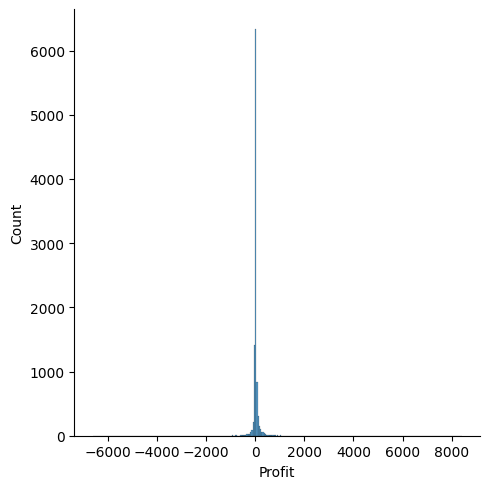

In [3]:
sns.displot(orders["Profit"], binwidth=50)

O histograma dos dados fica muito acentuado e fica dificil a visualização do comportamento dos dados sem tratamentos dos outliers

### Com tratamento de outlier

Com tratamento de outliers podemos remover os casos que estão muito fora da média e de 3 desvios e enviar para a área de negócio investigar os casos como os casos onde houveram maiores ganhos ou maiores perdas

Extração dos valores menores que 3 desvios nos ganhos(profits)

In [4]:
# outlied to less
avg = np.average(orders["Profit"])
std = np.std(orders["Profit"])
n_sigma = 3
df_profit_less = orders[ orders["Profit"]<(avg - n_sigma*std)]
df_profit_less

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
27,28,US-2015-150630,2015-09-17,2015-09-21,Standard Class,TB-21520,Tracy Blumstein,Consumer,United States,Philadelphia,...,19140,East,FUR-BO-10004834,Furniture,Bookcases,"Riverside Palais Royal Lawyers Bookcase, Royal...",3083.430,7,0.5,-1665.0522
165,166,CA-2014-139892,2014-09-08,2014-09-12,Standard Class,BM-11140,Becky Martin,Consumer,United States,San Antonio,...,78207,Central,TEC-MA-10000822,Technology,Machines,Lexmark MX611dhe Monochrome Laser Printer,8159.952,8,0.4,-1359.9920
215,216,CA-2015-146262,2015-01-02,2015-01-09,Standard Class,VW-21775,Victoria Wilson,Corporate,United States,Medina,...,44256,East,TEC-MA-10000864,Technology,Machines,Cisco 9971 IP Video Phone Charcoal,1188.000,9,0.7,-950.4000
463,464,CA-2016-109869,2016-04-22,2016-04-29,Standard Class,TN-21040,Tanja Norvell,Home Office,United States,Phoenix,...,85023,West,FUR-TA-10001889,Furniture,Tables,Bush Advantage Collection Racetrack Conference...,1272.630,6,0.5,-814.4832
683,684,US-2017-168116,2017-11-04,2017-11-04,Same Day,GT-14635,Grant Thornton,Corporate,United States,Burlington,...,27217,South,TEC-MA-10004125,Technology,Machines,Cubify CubeX 3D Printer Triple Head Print,7999.980,4,0.5,-3839.9904
869,870,CA-2016-158099,2016-09-03,2016-09-05,First Class,PK-18910,Paul Knutson,Home Office,United States,Philadelphia,...,19143,East,OFF-BI-10000545,Office Supplies,Binders,GBC Ibimaster 500 Manual ProClick Binding System,1141.470,5,0.7,-760.9800
1199,1200,CA-2016-130946,2016-04-08,2016-04-12,Standard Class,ZC-21910,Zuschuss Carroll,Consumer,United States,Houston,...,77041,Central,OFF-BI-10004995,Office Supplies,Binders,GBC DocuBind P400 Electric Binding System,1088.792,4,0.8,-1850.9464
1369,1370,US-2015-103471,2015-12-24,2015-12-28,Standard Class,JR-15670,Jim Radford,Consumer,United States,Colorado Springs,...,80906,West,FUR-BO-10002613,Furniture,Bookcases,"Atlantic Metals Mobile 4-Shelf Bookcases, Cust...",590.058,7,0.7,-786.7440
1803,1804,CA-2017-158379,2017-09-22,2017-09-26,Second Class,JA-15970,Joseph Airdo,Consumer,United States,Philadelphia,...,19134,East,OFF-SU-10002881,Office Supplies,Supplies,Martin Yale Chadless Opener Electric Letter Op...,4663.736,7,0.2,-1049.3406
1995,1996,US-2017-147221,2017-12-02,2017-12-04,Second Class,JS-16030,Joy Smith,Consumer,United States,Houston,...,77036,Central,OFF-AP-10002534,Office Supplies,Appliances,3.6 Cubic Foot Counter Height Office Refrigerator,294.620,5,0.8,-766.0120


Assim podemos ver quais foram os (37)maiores agressores na causa de perdas 

In [5]:
# outlied to less
avg = np.average(orders["Profit"])
std = np.std(orders["Profit"])
n_sigma = 3
df_profit_less = orders[ orders["Profit"]>(avg + n_sigma*std)]
df_profit_less

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
318,319,CA-2014-164973,2014-11-04,2014-11-09,Standard Class,NM-18445,Nathan Mautz,Home Office,United States,New York City,...,10024,East,TEC-MA-10002927,Technology,Machines,Canon imageCLASS MF7460 Monochrome Digital Las...,3991.980,2,0.0,1995.9900
353,354,CA-2016-129714,2016-09-01,2016-09-03,First Class,AB-10060,Adam Bellavance,Home Office,United States,New York City,...,10009,East,OFF-BI-10004995,Office Supplies,Binders,GBC DocuBind P400 Electric Binding System,4355.168,4,0.2,1415.4296
509,510,CA-2015-145352,2015-03-16,2015-03-22,Standard Class,CM-12385,Christopher Martinez,Consumer,United States,Atlanta,...,30318,South,OFF-BI-10003527,Office Supplies,Binders,Fellowes PB500 Electric Punch Plastic Comb Bin...,6354.950,5,0.0,3177.4750
515,516,CA-2017-127432,2017-01-22,2017-01-27,Standard Class,AD-10180,Alan Dominguez,Home Office,United States,Great Falls,...,59405,West,TEC-CO-10003236,Technology,Copiers,Canon Image Class D660 Copier,2999.950,5,0.0,1379.9770
910,911,CA-2017-137596,2017-09-02,2017-09-07,Standard Class,BE-11335,Bill Eplett,Home Office,United States,Jackson,...,49201,Central,TEC-AC-10004666,Technology,Accessories,Maxell iVDR EX 500GB Cartridge,1928.780,7,0.0,829.3754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9273,9274,CA-2017-146983,2017-09-02,2017-09-06,Standard Class,AH-10210,Alan Hwang,Consumer,United States,Henderson,...,42420,South,OFF-BI-10003650,Office Supplies,Binders,GBC DocuBind 300 Electric Binding Machine,1577.940,3,0.0,757.4112
9615,9616,CA-2014-128524,2014-11-11,2014-11-13,First Class,MZ-17515,Mary Zewe,Corporate,United States,Seattle,...,98115,West,OFF-BI-10003527,Office Supplies,Binders,Fellowes PB500 Electric Punch Plastic Comb Bin...,2033.584,2,0.2,762.5940
9741,9742,CA-2015-117086,2015-11-08,2015-11-12,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,...,5408,East,FUR-BO-10004834,Furniture,Bookcases,"Riverside Palais Royal Lawyers Bookcase, Royal...",4404.900,5,0.0,1013.1270
9929,9930,CA-2016-129630,2016-09-04,2016-09-04,Same Day,IM-15055,Ionia McGrath,Consumer,United States,San Francisco,...,94122,West,TEC-CO-10003763,Technology,Copiers,Canon PC1060 Personal Laser Copier,2799.960,5,0.2,944.9865


E os (70) maiores ganhos acima da esperado da média

E como mencionado podemos extrair esses casos não comuns e vermos como as ordens se comportam nos casos comuns apartir de histograma:

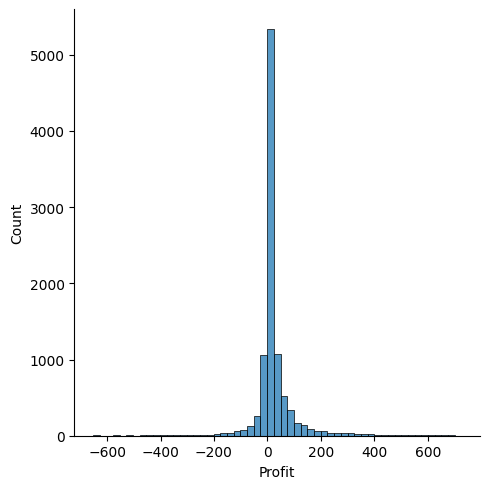

In [6]:
n_sigma = 3
df_profit_cleaned = orders[ orders["Profit"]<(avg + n_sigma*std)]
df_profit_cleaned = df_profit_cleaned[df_profit_cleaned["Profit"]>(avg - n_sigma*std) ]
df_profit_cleaned
sns.displot(df_profit_cleaned["Profit"], binwidth=25)

Vemos pelo grafico que a media está para valores positivos entre 0 e 25 onde se concentram o maior numero de ganhos nas ordens.

## Analise por regiao

In [15]:
regions = orders["Region"].unique()
for region in regions:
    region_data = orders["Profit"][orders["Region"] == region]
    sum_region = np.sum(region_data)
    avg = np.average(region_data)
    std = np.std(region_data)
    print(region)
    print(f"num_registers: {len(region_data)}")
    print(f"sum_profit: {sum_region:.2f}")
    print(f"avg_profit: {avg:.2f}")
    print(f"std_profit: {std:.2f}")
    

South
num_registers: 1620
sum_profit: 46749.43
avg_profit: 28.86
std_profit: 212.83
West
num_registers: 3203
sum_profit: 108418.45
avg_profit: 33.85
std_profit: 174.08
Central
num_registers: 2323
sum_profit: 39706.36
avg_profit: 17.09
std_profit: 291.42
East
num_registers: 2848
sum_profit: 91522.78
avg_profit: 32.14
std_profit: 251.56


Podemos ver que o maior lucro obtido é o do oeste com 108418.45 com paravel com o valor do leste. O menor lucro é da regiao central com 39706.36 valor comparavel com o ganho da regiao sul. Vemos tambem que o numero de registros da região sul é significativamente menor que da região central o que pode ser varios fatores, numeros de estabelecimentos e numero de clientes disponíveis na região. 

Isso dá informações relevantes na tomada de decição no momento de fazer um marqueting mais focado para cada uma das regiões.

## Analise por segmento

In [20]:
segments = orders["Segment"].unique()
for segment in segments:
    segment_data = orders["Profit"][orders["Segment"] == segment]
    sum_segment = np.sum(segment_data)
    avg = np.average(segment_data)
    std = np.std(segment_data)
    print(segment)
    print(f"num_registers: {len(segment_data)}")
    print(f"sum_profit: {sum_segment}")
    print(f"avg_profit: {avg:.2f}")
    print(f"std_profit: {std:.2f}")
    

Consumer
num_registers: 5191
sum_profit: 134119.20919999995
avg_profit: 25.84
std_profit: 242.57
Corporate
num_registers: 3020
sum_profit: 91979.13399999999
avg_profit: 30.46
std_profit: 231.95
Home Office
num_registers: 1783
sum_profit: 60298.67849999998
avg_profit: 33.82
std_profit: 212.32


Na ordem de mais rentavel para menos rentavel Consumidor direto, corporativo e home office. Sobre as medias os valores sao comparaveis entre si e não conseguimos fazer uma distinção no comportamento de aquisição em relação aos valores das transações em realação ao lucro associado. 

## Logistica

In [22]:
orders["shipment_time"] = orders["Ship Date"] - orders["Order Date"]

### Shipment time by shipment Mode

In [32]:
ship_modes = orders["Ship Mode"].unique()
for ship_mode in ship_modes:
    ship_data = orders["shipment_time"][orders["Ship Mode"] == ship_mode]
    #sum_ship = ship_data.mean(numeric_only=False)
    avg = ship_data.mean(numeric_only=False)
    std = ship_data.std(numeric_only=False)
    #std = np.std(ship_data)
    print(ship_mode)
    print(f"num_registers: {len(ship_data)}")
    #print(f"sum_profit: {sum_ship}")
    print(f"avg_profit: {avg}")
    print(f"std_profit: {std}")

Second Class
num_registers: 1945
avg_profit: 3 days 05:42:47.197943444
std_profit: 1 days 04:31:04.369531051
Standard Class
num_registers: 5968
avg_profit: 5 days 00:09:24.611260053
std_profit: 1 days 00:15:34.279952478
First Class
num_registers: 1538
avg_profit: 2 days 04:23:05.695708712
std_profit: 0 days 18:33:52.921370074
Same Day
num_registers: 543
avg_profit: 0 days 01:03:38.784530386
std_profit: 0 days 04:56:14.749306559


Aqui podemos classificar o serviço de entrega e fazer a escolha de qual dos serviços utilizados oferece melhor custo beneficio, imagine que o o servico de segunda classe seja mais barato que o serviço padrão podemos ter um ganho tanto na experiencia do usuario que vai receber o seu pedido de maneira mais agil e tera um custo reduzido na entrega do pedido.

# Conclusão

Esses foram exemplos de analises que trazem informações relevantes para o negócio e que podem ser realizadas e com infraestrutura pode-se automatizar esses relatórios, criar alertas em casos expecificos por exemplo quando a perda está muito fora do que é esperado comumente ou quando o ganho é elevado de mais o que pode ser indício de fraude. Além de deixar o dados diponíveis para outras analizes o que em arquivos soltos fica dificil conseguir acessar essas informações de forma ágil a tempo de reagir ao mercado.